In [ ]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

/usr/local/lib/python3.7/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [ ]:
sentiment = SentimentIntensityAnalyzer()

In [ ]:
import numpy as np
import pandas as pd
import nltk
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import nltk
nltk.download(['punkt','stopwords'])
from nltk.corpus import stopwords
stopwords = stopwords.words('english')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
!pip install vaderSentiment

     |████████████████████████████████| 125 kB 9.0 MB/s 


In [ ]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Sentiment analysis/drugsComTrain_raw_sentiment.csv', encoding= 'unicode_escape')

In [ ]:
data.shape

(161297, 8)

In [ ]:
data.isnull().any().any()

True

In [ ]:
data.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161297 entries, 0 to 161296
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   uniqueID     161297 non-null  int64 
 1   drugName     161297 non-null  object
 2   condition    160398 non-null  object
 3   review       161297 non-null  object
 4   rating       161297 non-null  int64 
 5   date         161297 non-null  object
 6   usefulCount  161297 non-null  int64 
 7   Sentiment    161297 non-null  object
dtypes: int64(3), object(5)
memory usage: 9.8+ MB


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: null_counts is deprecated. Use show_counts instead
  """Entry point for launching an IPython kernel.


In [ ]:
data_new = data[data['condition'].notnull()]

In [ ]:
data_new.info(null_counts=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: null_counts is deprecated. Use show_counts instead
  """Entry point for launching an IPython kernel.


<class 'pandas.core.frame.DataFrame'>
Int64Index: 160398 entries, 0 to 161296
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   uniqueID     160398 non-null  int64 
 1   drugName     160398 non-null  object
 2   condition    160398 non-null  object
 3   review       160398 non-null  object
 4   rating       160398 non-null  int64 
 5   date         160398 non-null  object
 6   usefulCount  160398 non-null  int64 
 7   Sentiment    160398 non-null  object
dtypes: int64(3), object(5)
memory usage: 11.0+ MB


In [ ]:
data_new.isnull().any().any()

False

In [ ]:
!pip install vaderSentiment

In [ ]:
data_new['vader_score'] = data_new['review'].apply(lambda x: analyzer.polarity_scores(x)['compound'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
positive_num = len(data_new[data_new['vader_score']>= 0.05])
neutral_num = len(data_new[data_new['vader_score']< 0.05]) and len(data_new[data_new['vader_score']>= 0.00])
negative_num = len(data_new[data_new['vader_score']< 0.00])

In [ ]:
positive_num, negative_num, neutral_num

(77683, 77641, 82757)

In [ ]:
data_new['vader_sentiment_label'] = data_new['vader_score'].map(lambda x : int(1) if x>= 0.05  else int (-1) if x<0.00 else int(0))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
data_new.head()

,uniqueID,drugName,condition,review,rating,date,usefulCount,Sentiment,vader_score,vader_sentiment_label
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,20-May-12,27,Positive,-0.2960,-1
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,27-Apr-10,192,Positive,0.9174,1
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,14-Dec-09,17,Neutral,0.6160,1
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8,3-Nov-15,10,Positive,0.7184,1
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9,27-Nov-16,37,Positive,0.9403,1


In [ ]:
data_new['vader_sentiment_label'].value_counts()

 1    77683
-1    77641
 0     5074
Name: vader_sentiment_label, dtype: int64

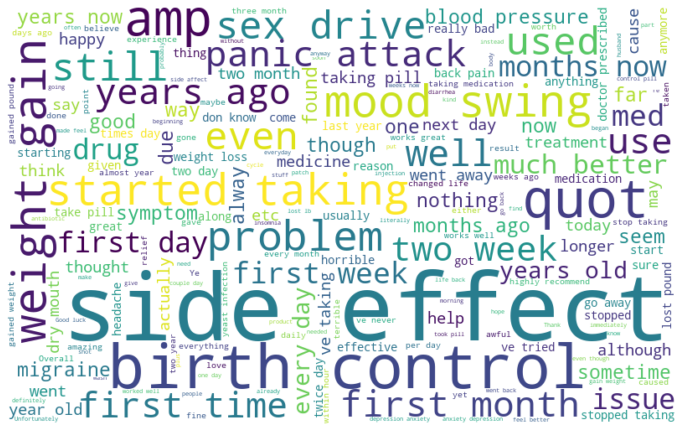

In [ ]:
all_words = ' '.join([text for text in data_new['review']])
from wordcloud import WordCloud
wordcloud = WordCloud(width = 800, height = 500, background_color = 'white', random_state = 21, max_font_size = 110).generate(all_words)

plt.figure(figsize=(12,12))
plt.imshow(wordcloud, interpolation = "bilinear")
plt.axis('off')
plt.show()

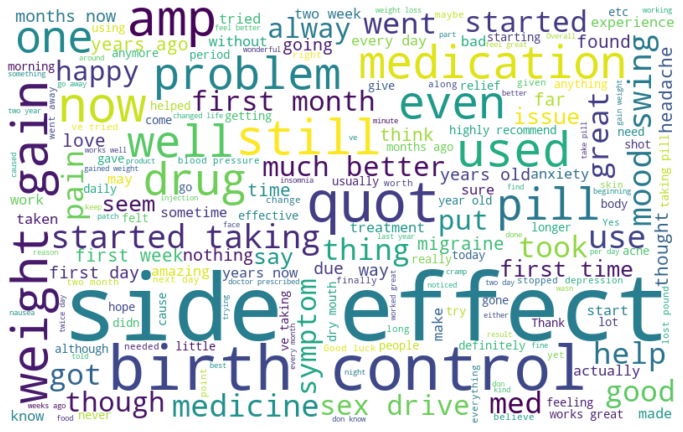

In [ ]:
normal_words = ' '.join([text for text in data_new['review'][data_new['vader_sentiment_label']== 1]])

wordcloud = WordCloud(width = 800, height = 500, background_color = 'white', random_state = 21, max_font_size = 110).generate(normal_words)
plt.figure(figsize=(12,12))
plt.imshow(wordcloud, interpolation = "bilinear")
plt.axis('off')
plt.show()

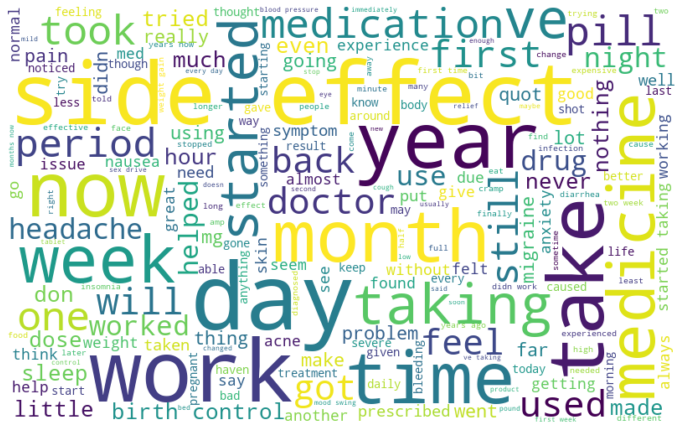

In [ ]:
normal_words = ' '.join([text for text in data_new['review'][data_new['vader_sentiment_label']== 0]])

wordcloud = WordCloud(width = 800, height = 500, background_color = 'white', random_state = 21, max_font_size = 110).generate(normal_words)
plt.figure(figsize=(12,12))
plt.imshow(wordcloud, interpolation = "bilinear")
plt.axis('off')
plt.show()

In [ ]:
! pip install git+https://github.com/laxmimerit/preprocess_kgptalkie.git --upgrade --force-reinstall

  Cloning https://github.com/laxmimerit/preprocess_kgptalkie.git to /tmp/pip-req-build-p2umya46
  Running command git clone -q https://github.com/laxmimerit/preprocess_kgptalkie.git /tmp/pip-req-build-p2umya46
  Created wheel for preprocess-kgptalkie: filename=preprocess_kgptalkie-0.1.3-py3-none-any.whl size=11756 sha256=fbbfbb45a7ece13bef9b34f4d2ada83ac500eefe62bf7f1fe23abd6f77b8d2e6
  Stored in directory: /tmp/pip-ephem-wheel-cache-1e0rlczj/wheels/0d/b3/29/bfe3deffda68980088d17b81331be6667e837ffb4a071bae82
Successfully built preprocess-kgptalkie


In [ ]:
import preprocess_kgptalkie as ps
import re

In [ ]:
def get_clean(x):
    x = str(x).lower().replace('\\', '').replace('_', ' ')
    x = ps.cont_exp(x)
    x = ps.remove_emails(x)
    x = ps.remove_urls(x)
    x = ps.remove_html_tags(x)
    x = ps.remove_accented_chars(x)
    x = ps.remove_special_chars(x)
    x = re.sub("(.)\\1{2,}", "\\1", x)
    return x

In [ ]:
data_new['review'] = data_new['review'].apply(lambda x: get_clean(x))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

In [ ]:
tfidf = TfidfVectorizer(max_features=40000, ngram_range=(1,5),  stop_words='english' , analyzer='word')

In [ ]:
data_new['review']

0         it has no side effect i take it in combination...
1         my son is halfway through his fourth week of i...
2         i used to take another oral contraceptive whic...
3         this is my first time using any form of birth ...
4         suboxone has completely turned my life around ...
                                ...                        
161292    i wrote my first report in midoctober of 2014 ...
161293    i was given this in iv before surgey i immedia...
161294    limited improvement after 4 months developed b...
161295    ive been on thyroid medication 49 years i spen...
161296    ive had chronic constipation all my adult life...
Name: review, Length: 160398, dtype: object

In [ ]:
X = tfidf.fit_transform(data_new['review'])
Y = data_new['vader_sentiment_label']

In [ ]:
X

<160398x40000 sparse matrix of type '<class 'numpy.float64'>'
	with 7334898 stored elements in Compressed Sparse Row format>

In [ ]:
Y

0        -1
1         1
2         1
3         1
4         1
         ..
161292    1
161293   -1
161294   -1
161295    1
161296    1
Name: vader_sentiment_label, Length: 160398, dtype: int64

In [ ]:
X.shape, Y.shape

((160398, 40000), (160398,))

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

In [ ]:
X_train.shape

(128318, 40000)

In [ ]:
Y_train.shape

(128318,)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, Y_train)

KNeighborsClassifier()

In [ ]:
KNN_pred = classifier.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(Y_test, KNN_pred))
print(classification_report(Y_test, KNN_pred))

[[ 2097 13132   210]
 [   51   935    36]
 [  741 13511  1367]]
              precision    recall  f1-score   support

          -1       0.73      0.14      0.23     15439
           0       0.03      0.91      0.07      1022
           1       0.85      0.09      0.16     15619

    accuracy                           0.14     32080
   macro avg       0.54      0.38      0.15     32080
weighted avg       0.76      0.14      0.19     32080



Text(0.5, 145.31999999999996, 'Predicted')

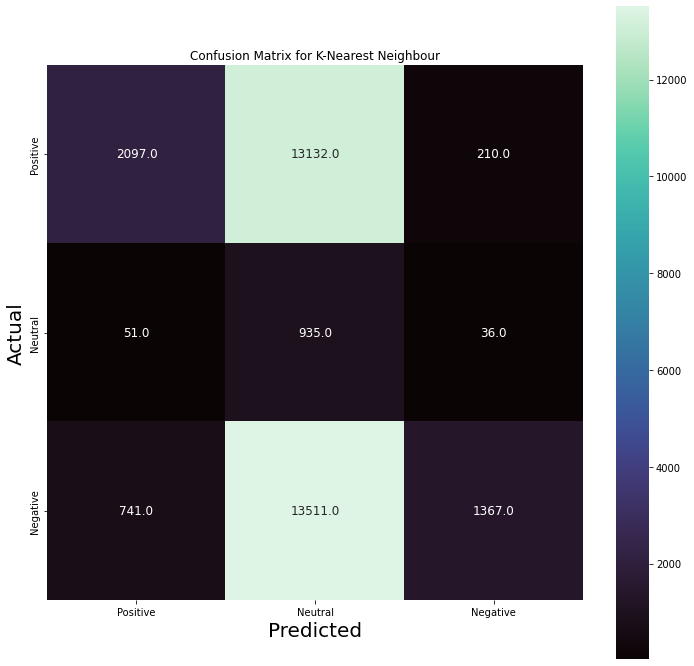

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import classification_report
Ypred = KNN_pred
label=['Positive', 'Neutral','Negative']
Ytrue = Y_test 
cm = confusion_matrix(Ytrue, Ypred)
plt.figure(figsize=(12, 12))
plt.title("Confusion Matrix for K-Nearest Neighbour")
ax = sns.heatmap(cm, cmap="mako", fmt=".01f",annot_kws={'size':12}, annot=True, square=True, xticklabels=label, yticklabels=label)
ax.set_ylabel('Actual', fontsize=20)
ax.set_xlabel('Predicted', fontsize=20)